Task 1: ---------------------------------------------------------
Accuracy on training set: 0.96
Accuracy on test set: 0.96
C=0.01
Accuracy on training set: 0.95
Accuracy on test set: 0.95

C=1.00
Accuracy on training set: 0.96
Accuracy on test set: 0.96

C=100.00
Accuracy on training set: 0.98
Accuracy on test set: 0.97

Accuracy: 0.95
Precision: 0.95
Recall: 0.95
Confusion Matrix:
[[49  4]
 [ 3 87]]

Task 2: ---------------------------------------------------------
Accuracy on training set: 0.92
Accuracy on test set: 0.92
Best parameters: {'C': 0.1, 'gamma': 0.2}
Accuracy on training set (best model): 0.63
Accuracy on test set (best model): 0.63
Accuracy: 0.6293706293706294
Precision: 0.8146853146853147
Recall: 0.5
Confusion Matrix:
[[ 0 53]
 [ 0 90]]

Task 3: ---------------------------------------------------------
Decision Tree model accuracy on training set: 1.00
Decision Tree model accuracy on test set: 0.92
K-Nearest Neighbors model accuracy on training set: 0.95
K-Nearest Neig

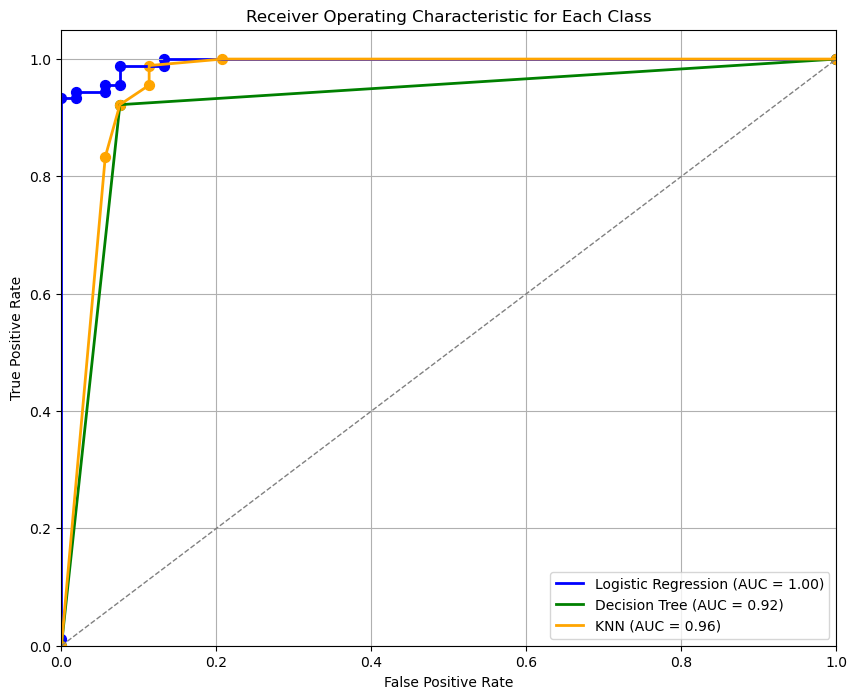

In [3]:
import numpy as np
import mglearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_curve, auc
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import label_binarize

# Task 1: Logistic Regression
print("Task 1: ---------------------------------------------------------")
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

print("Accuracy on training set: {:.2f}".format(model.score(X_train, y_train)))
print("Accuracy on test set: {:.2f}".format(model.score(X_test, y_test)))

C_values = [0.01, 1, 100]
for C in C_values:
    model = LogisticRegression(C=C, max_iter=10000)
    model.fit(X_train, y_train)
    print("C={:.2f}".format(C))
    print("Accuracy on training set: {:.2f}".format(model.score(X_train, y_train)))
    print("Accuracy on test set: {:.2f}".format(model.score(X_test, y_test)))
    print("")

model = LogisticRegression(penalty='l2', C=0.1, max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy: {:.2f}".format(accuracy))
print("Precision: {:.2f}".format(precision))
print("Recall: {:.2f}".format(recall))
print("Confusion Matrix:")
print(conf_matrix)

# Task 2: SVM
print("\nTask 2: ---------------------------------------------------------")
model_SVC = SVC()
model_SVC.fit(X_train, y_train)
train_accuracy = model_SVC.score(X_train, y_train)
test_accuracy = model_SVC.score(X_test, y_test)

print("Accuracy on training set: {:.2f}".format(train_accuracy))
print("Accuracy on test set: {:.2f}".format(test_accuracy))

SVC_params = {"C": [0.1, 1, 10], "gamma": [0.2, 0.6, 1]}
SVC_grid = GridSearchCV(model_SVC, SVC_params, cv=5, n_jobs=-1)
SVC_grid.fit(X_train, y_train)

best_params = SVC_grid.best_params_
print("Best parameters:", best_params)

best_model = SVC(**best_params)
best_model.fit(X_train, y_train)
best_train_accuracy = best_model.score(X_train, y_train)
best_test_accuracy = best_model.score(X_test, y_test)

print("Accuracy on training set (best model): {:.2f}".format(best_train_accuracy))
print("Accuracy on test set (best model): {:.2f}".format(best_test_accuracy))

y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro', zero_division=1)
recall = recall_score(y_test, y_pred, average='macro')
conf_matrix = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("Confusion Matrix:")
print(conf_matrix)

# Task 3: Decision Tree and KNN
print("\nTask 3: ---------------------------------------------------------")
tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

knn_model = KNeighborsClassifier()
knn_model.fit(X_train, y_train)

tree_train_accuracy = tree_model.score(X_train, y_train)
tree_test_accuracy = tree_model.score(X_test, y_test)

knn_train_accuracy = knn_model.score(X_train, y_train)
knn_test_accuracy = knn_model.score(X_test, y_test)

print("Decision Tree model accuracy on training set: {:.2f}".format(tree_train_accuracy))
print("Decision Tree model accuracy on test set: {:.2f}".format(tree_test_accuracy))

print("K-Nearest Neighbors model accuracy on training set: {:.2f}".format(knn_train_accuracy))
print("K-Nearest Neighbors model accuracy on test set: {:.2f}".format(knn_test_accuracy))

# Task 4: ROC Curves
print("\nTask 4: ---------------------------------------------------------")
y_bin = label_binarize(y_test, classes=np.unique(y_test))

# Calculate ROC curves and AUC for each model
models = [model, best_model, tree_model, knn_model]
model_names = ['Logistic Regression', 'SVM', 'Decision Tree', 'KNN']
colors = ['blue', 'red', 'green', 'orange']

plt.figure(figsize=(10, 8))
for i, (model, name) in enumerate(zip(models, model_names)):
    if hasattr(model, "predict_proba"):
        probas = model.predict_proba(X_test)
        if len(np.unique(y_test)) == 2:
            fpr, tpr, _ = roc_curve(y_test, probas[:, 1])
            plt.plot(fpr, tpr, color=colors[i], lw=2, label=name + ' (AUC = {:.2f})'.format(auc(fpr, tpr)))
            plt.scatter(fpr, tpr, marker='o', color=colors[i], s=50)
        else:
            for j in range(probas.shape[1]):
                fpr, tpr, _ = roc_curve(y_bin[:, j], probas[:, j])
                plt.plot(fpr, tpr, color=colors[i], lw=2, label=name + ' Class {} (AUC = {:.2f})'.format(j, auc(fpr, tpr)))
                plt.scatter(fpr, tpr, marker='o', color=colors[i], s=50)

plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Each Class')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()